# I : notebook_EDA introduction

### I / A : Data dictionary

1. longitude
2. latitude
3. housingMedianAge: Âge médian d'une maison dans un pâté de maisons ; un chiffre plus bas correspond à un bâtiment plus récent.
4. totalRooms: Nombre total de chambres dans un bloc
5. totalBedrooms: Nombre total de chambres dans un bloc
6. population: Nombre total de personnes résidant dans un bloc
7. households: Nombre total de ménages, c'est-à-dire un groupe de personnes résidant dans une unité d'habitation, pour un bloc
8. medianIncome: Revenu médian des ménages dans un bloc de maisons (mesuré en dizaines de milliers de dollars US)
9. medianHouseValue: Valeur médiane des maisons pour les ménages d'un bloc (mesurée en dollars US)
10. oceanProximity: Situation de la maison par rapport à la mer

### I / B : Goal of this notebook.
In this notebook, we will do our Exploratory Data Analysis for the Silicon Valley project.
We will try to do that in a specific order and with comments in order to explain these different steps.

# II : Preliminary steps

### II / A : Importing libraries 

In [1]:
# Here, we import the libraries that we will use later.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ScikitLearn import
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

### II / B : Importing and copying our dataset 

In [3]:
# We import the dataset from our folder, using pd.read_csv()
raw_df = pd.read_csv('data/4054a881-9509-4cc0-9501-1174d5bbf6fc.txt')
raw_df

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN


In [4]:
# Lets get rid of the first column, which is not in the dataset that we use
raw_df = raw_df.drop("Unnamed: 0", axis=1)
raw_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
16507,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND
16508,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY
16509,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND
16510,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN


In [5]:
# Now we will create a copy of this dataframe, in order to keep it without clean and do all the changes inside the copy.
# This copy will be the dataframe that we will use.
clean_df = raw_df.copy()
clean_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
16507,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND
16508,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY
16509,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND
16510,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN


In [5]:
# We can use .info() on this new dataframe to have a short preview of these data.
clean_df.info()

# 1st info: We have 10 columns, 9 features and 1 target (median_house_value).
# 2nd info: one of the feature seems to have missing data (total_bedrooms).
# 3rd info: all the features are of type float64, except for the ocean_proximity.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16336 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


#### We are done with preliminary steps, and now we can go to the EDA

# III : Exploratory Data Analysis

### III / A : Basic exploration

In [6]:
# We want to have a short description of different statistics of our dataset, using .describe()
clean_df.describe()

# 1st info: there's a scale difference between some of our features, so maybe we will need to scale the data if needed.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16336.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.564046,35.626523,28.624516,2644.170603,539.319540,1435.017260,501.135962,3.864091,206509.251453
std,2.005033,2.139150,12.597980,2213.946369,425.207704,1158.151967,385.650673,1.893244,115225.957661
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1446.000000,296.000000,788.000000,280.000000,2.562500,119400.000000
50%,-118.490000,34.250000,29.000000,2116.000000,435.000000,1168.000000,410.000000,3.531300,179300.000000
75%,-118.010000,37.710000,37.000000,3154.000000,647.000000,1738.000000,606.000000,4.733225,264500.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### III / B : Duplicates and outliers

In [14]:
# We can also check if we have duplicated rows. If yes, we will remove the duplicate one 
# because it could lead to wrong predictions with our model.
clean_df.duplicated().sum()

# 1st info: the dataset has no duplicated rows.

0

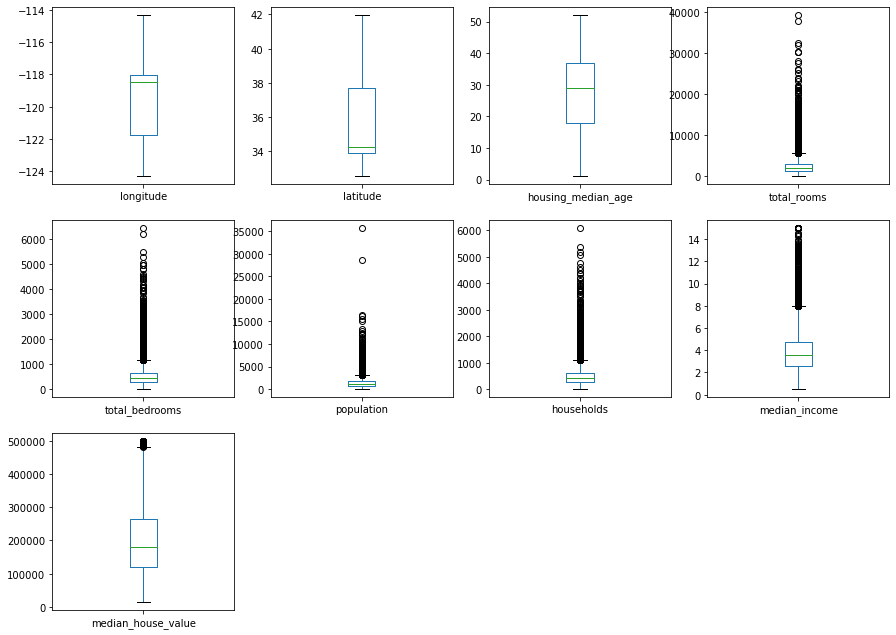

In [8]:
# For the outliers, we can boxplot our features to see if we have outliers.
clean_df.plot(kind='box', subplots=True, layout=(4, 4), figsize = (15, 15));

# 1st info: There's a lot of outliers in many features (total_rooms, total_bedrooms, population, households, median_income)
# I will keep them for the first iterations.

### III / B : Univariate EDA

In [15]:
# We will create a new function for a preview of each feature
def univariate_analysis(variable, stats):
    plt.subplot(1,2,1)
    sns.histplot(variable)
    plt.title("Histogram chart")
    plt.subplot(1,2,2)
    sns.boxplot(data=variable,orient="v")
    plt.title("Box plot")
    plt.subplots_adjust(wspace=0.5)
    if stats == True:
        print('Univariate preview')
        print(variable.describe())

Univariate preview
count    16512.000000
mean        28.624516
std         12.597980
min          1.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: housing_median_age, dtype: float64


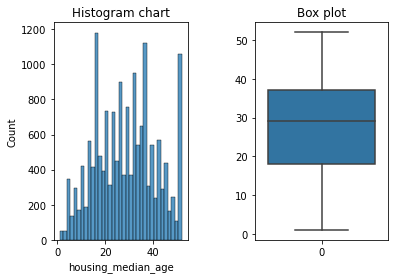

In [16]:
# Univariate preview for housing_median_age feature
univariate_analysis(clean_df.housing_median_age, True)

Univariate preview
count    16512.000000
mean      2644.170603
std       2213.946369
min          6.000000
25%       1446.000000
50%       2116.000000
75%       3154.000000
max      39320.000000
Name: total_rooms, dtype: float64


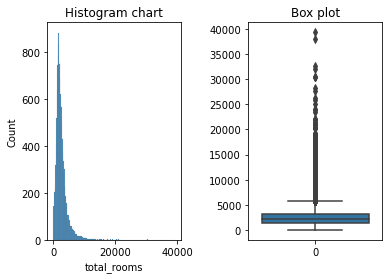

In [17]:
# Univariate preview for total_rooms feature
univariate_analysis(clean_df.total_rooms, True)

Univariate preview
count    16336.000000
mean       539.319540
std        425.207704
min          2.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64


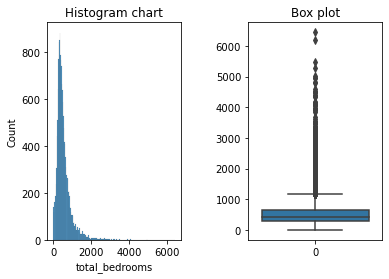

In [18]:
# Univariate preview for total_bedrooms feature
univariate_analysis(clean_df.total_bedrooms, True)

Univariate preview
count    16512.000000
mean      1435.017260
std       1158.151967
min          3.000000
25%        788.000000
50%       1168.000000
75%       1738.000000
max      35682.000000
Name: population, dtype: float64


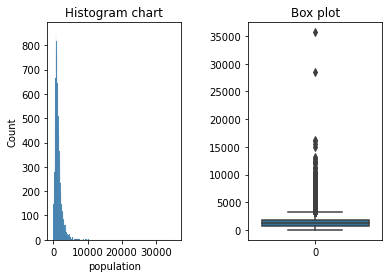

In [19]:
# Univariate preview for population feature
univariate_analysis(clean_df.population, True)

Univariate preview
count    16512.000000
mean       501.135962
std        385.650673
min          2.000000
25%        280.000000
50%        410.000000
75%        606.000000
max       6082.000000
Name: households, dtype: float64


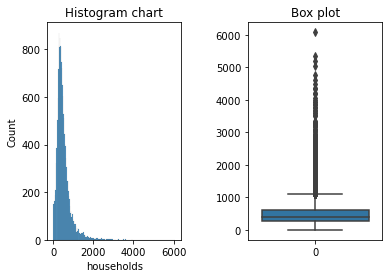

In [20]:
# Univariate preview for households feature
univariate_analysis(clean_df.households, True)

Univariate preview
count    16512.000000
mean         3.864091
std          1.893244
min          0.499900
25%          2.562500
50%          3.531300
75%          4.733225
max         15.000100
Name: median_income, dtype: float64


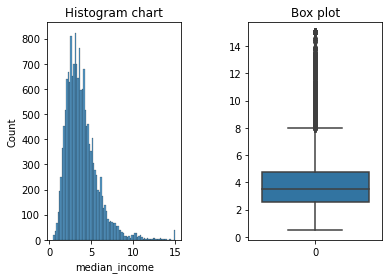

In [21]:
# Univariate preview for median_income feature
univariate_analysis(clean_df.median_income, True)

Univariate preview
count     16512.000000
mean     206509.251453
std      115225.957661
min       14999.000000
25%      119400.000000
50%      179300.000000
75%      264500.000000
max      500001.000000
Name: median_house_value, dtype: float64


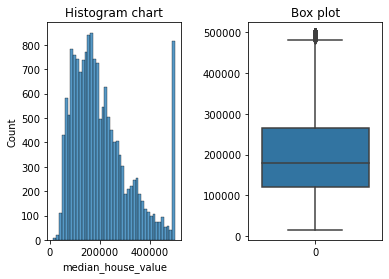

In [22]:
# Univariate preview for median_house_value feature
univariate_analysis(clean_df.median_house_value, True)

Univariate preview
count     16512.000000
mean     206509.251453
std      115225.957661
min       14999.000000
25%      119400.000000
50%      179300.000000
75%      264500.000000
max      500001.000000
Name: median_house_value, dtype: float64


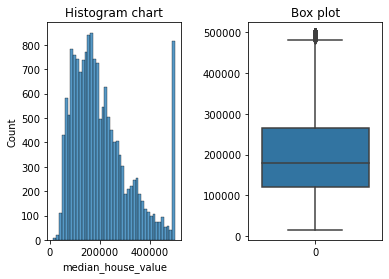

In [23]:
# Univariate preview for median_house_value feature
univariate_analysis(clean_df.median_house_value, True)

### III / B : Splitting dataframe (train and test)

In [24]:
# We need to split our dataframe, because we want one train_df (70% of data) and one test_df (30% of data)
# We will kepp this split for all the project, so we can comment this line in order to void running this cell again

# train_df, test_df = train_test_split(clean_df, train_size=0.7, test_size=0.3)

train_df = pd.read_csv("data/train_df_1.csv")
test_df = pd.read_csv("data/test_df_1.csv")

In [25]:
# Checking the train_df
print(train_df.shape)
train_df.head()

(11438, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-118.03,34.16,39.0,2731.0,366.0,1034.0,338.0,9.8098,500001.0,INLAND
1,-121.62,39.16,16.0,2037.0,464.0,1267.0,451.0,2.4556,97100.0,INLAND
2,-120.55,38.45,17.0,2277.0,474.0,767.0,356.0,2.5208,99100.0,INLAND
3,-117.10,32.67,26.0,2629.0,763.0,2721.0,767.0,2.0982,109100.0,NEAR OCEAN
4,-122.89,38.38,16.0,2017.0,369.0,931.0,336.0,5.7664,267500.0,<1H OCEAN


In [26]:
# Checking the test_df
print(test_df.shape)
test_df.head()

(4898, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-121.69,36.62,19.0,1907.0,323.0,681.0,270.0,6.0332,244900.0,<1H OCEAN
1,-122.64,37.96,29.0,377.0,58.0,151.0,67.0,9.5551,500001.0,NEAR OCEAN
2,-121.49,38.47,26.0,6121.0,1185.0,4224.0,1105.0,2.3496,68000.0,INLAND
3,-121.88,37.39,13.0,3334.0,565.0,2240.0,561.0,7.1050,273900.0,<1H OCEAN
4,-117.25,34.12,17.0,3107.0,752.0,2160.0,643.0,1.8463,72600.0,INLAND


### III / C : Missing values

In [27]:
# We will use .isnull().sum() to check how many missing values we have for each feature in our train_df
train_df.isnull().sum()

# 1st info: all the missing data are in the total_bedrooms feature.

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [28]:
# We will use .isnull().sum() to check how many missing values we have for each feature in our test_df
test_df.isnull().sum()

# 1st info: all the missing data are in the total_bedrooms feature.

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [29]:
# We can use imputation with these missing values (mean, median,...). But I will rather remove the rows with missing values.
# We have more than 11 000 rows, so I will assume that removing 176 rows will not have a huge negative impact.
train_df = train_df.dropna(axis=0)
train_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [31]:
# We can use imputation with these missing values (mean, median,...). But I will rather remove the rows with missing values.
# We have more than 4000 rows, so I will assume that removing 176 rows will not have a huge negative impact.
test_df = test_df.dropna(axis=0)
test_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [26]:
# We will do our first iteration with this train_df_1 dataframe, just to get a baseline score using only missing values
train_df.to_csv("C:/Users/SImplon.co/Documents/JonathanRaso/simplon/Arturo/05_silcon_valley_linear/data/train_df_1.csv", index=False)

In [27]:
# We will do our first iteration with this test_df_1 dataframe, just to get a baseline score using only missing values
test_df.to_csv("C:/Users/SImplon.co/Documents/JonathanRaso/simplon/Arturo/05_silcon_valley_linear/data/test_df_1.csv", index=False)

### III / C : Data scaling and ocean_proximity removed

In [32]:
# First we will try to standardize our data, but only specific columns
drop_scale_train_df = pd.read_csv("data/train_df_1.csv")
drop_scale_test_df = pd.read_csv("data/test_df_1.csv")

col_names = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

train_features = drop_scale_train_df[col_names]
test_features = drop_scale_test_df[col_names]

# Use scaler of choice; here Standard scaler is used
scaler = StandardScaler().fit(train_features.values)

train_features = scaler.transform(train_features.values)
test_features = scaler.transform(test_features.values)

drop_scale_train_df[col_names] = train_features
drop_scale_test_df[col_names] = test_features

In [33]:
# We will do our second iteration with this train_df_2 dataframe (standardscaler)
drop_scale_train_df.to_csv("C:/Users/SImplon.co/Documents/JonathanRaso/simplon/Arturo/05_silcon_valley_linear/data/train_df_2.csv", index=False)

In [34]:
# We will do our second iteration with this test_df_2 dataframe (standardscaler)
drop_scale_test_df.to_csv("C:/Users/SImplon.co/Documents/JonathanRaso/simplon/Arturo/05_silcon_valley_linear/data/test_df_2.csv", index=False)

In [36]:
# We can also try to normalize our data, with the same specific columns
drop_norm_train_df = pd.read_csv("data/train_df_1.csv")
drop_norm_test_df = pd.read_csv("data/test_df_1.csv")

col_names = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

norm_train_features = drop_norm_train_df[col_names]
norm_test_features = drop_norm_test_df[col_names]

# Use scaler of choice; here Standard scaler is used
scaler = MinMaxScaler().fit(norm_train_features.values)

train_features = scaler.transform(norm_train_features.values)
test_features = scaler.transform(norm_test_features.values)

drop_norm_train_df[col_names] = norm_train_features
drop_norm_test_df[col_names] = norm_test_features

# drop_norm_train_df.head()
# drop_norm_test_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-121.69,36.62,19.0,1907.0,323.0,681.0,270.0,6.0332,244900.0,<1H OCEAN
1,-122.64,37.96,29.0,377.0,58.0,151.0,67.0,9.5551,500001.0,NEAR OCEAN
2,-121.49,38.47,26.0,6121.0,1185.0,4224.0,1105.0,2.3496,68000.0,INLAND
3,-121.88,37.39,13.0,3334.0,565.0,2240.0,561.0,7.1050,273900.0,<1H OCEAN
4,-117.25,34.12,17.0,3107.0,752.0,2160.0,643.0,1.8463,72600.0,INLAND


In [37]:
# We will do our third iteration with this train_df_3 dataframe (MinMaxScaler)
drop_norm_train_df.to_csv("C:/Users/SImplon.co/Documents/JonathanRaso/simplon/Arturo/05_silcon_valley_linear/data/train_df_3.csv", index=False)

In [38]:
# We will do our third iteration with this test_df_3 dataframe (MinMaxScaler)
drop_norm_test_df.to_csv("C:/Users/SImplon.co/Documents/JonathanRaso/simplon/Arturo/05_silcon_valley_linear/data/test_df_3.csv", index=False)

### III / C : Changing feature type and encoding

In [6]:
encoding_train_df = pd.read_csv("data/train_df_3.csv")
encoding_test_df = pd.read_csv("data/test_df_3.csv")

encoding_test_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-121.69,36.62,19.0,1907.0,323.0,681.0,270.0,6.0332,244900.0,<1H OCEAN
1,-122.64,37.96,29.0,377.0,58.0,151.0,67.0,9.5551,500001.0,NEAR OCEAN
2,-121.49,38.47,26.0,6121.0,1185.0,4224.0,1105.0,2.3496,68000.0,INLAND
3,-121.88,37.39,13.0,3334.0,565.0,2240.0,561.0,7.1050,273900.0,<1H OCEAN
4,-117.25,34.12,17.0,3107.0,752.0,2160.0,643.0,1.8463,72600.0,INLAND


In [18]:
# We want to change the type of the ocean_proximity feature. Going from object to category type.
data_df["ocean_proximity"] = data_df["ocean_proximity"].astype('category')
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16336 entries, 0 to 16511
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           16336 non-null  float64 
 1   latitude            16336 non-null  float64 
 2   housing_median_age  16336 non-null  float64 
 3   total_rooms         16336 non-null  float64 
 4   total_bedrooms      16336 non-null  float64 
 5   population          16336 non-null  float64 
 6   households          16336 non-null  float64 
 7   median_income       16336 non-null  float64 
 8   median_house_value  16336 non-null  float64 
 9   ocean_proximity     16336 non-null  category
dtypes: category(1), float64(9)
memory usage: 1.8 MB


<ipython-input-18-0ff330b072c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df["ocean_proximity"] = data_df["ocean_proximity"].astype('category')


### III / D : Data scaling

### III / E : Data visualization

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

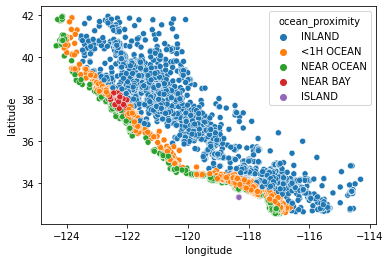

In [42]:
sns.scatterplot(data=clean_df, x="longitude", y="latitude", hue="ocean_proximity")

In [7]:
testing_corr = clean_df.corr()
testing_corr.style.background_gradient(cmap='coolwarm')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924753,-0.109873,0.044776,0.069623,0.099824,0.055629,-0.019501,-0.046754
latitude,-0.924753,1.000000,0.010653,-0.035012,-0.065210,-0.106416,-0.068901,-0.076643,-0.143970
housing_median_age,-0.109873,0.010653,1.000000,-0.362083,-0.324779,-0.295541,-0.307466,-0.113804,0.108626
total_rooms,0.044776,-0.035012,-0.362083,1.000000,0.932408,0.855772,0.920225,0.198840,0.133218
total_bedrooms,0.069623,-0.065210,-0.324779,0.932408,1.000000,0.878581,0.979994,-0.005643,0.047478
population,0.099824,-0.106416,-0.295541,0.855772,0.878581,1.000000,0.907647,0.004353,-0.027441
households,0.055629,-0.068901,-0.307466,0.920225,0.979994,0.907647,1.000000,0.014794,0.063245
median_income,-0.019501,-0.076643,-0.113804,0.198840,-0.005643,0.004353,0.014794,1.000000,0.689659
median_house_value,-0.046754,-0.143970,0.108626,0.133218,0.047478,-0.027441,0.063245,0.689659,1.000000
